<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류
> 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류하는 방법을 배우기

#### 패션 MNIST 데이터 불러오길

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

#### 합성곱 신경망 만들기
- 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산

In [ ]:
# 합성곱 층 생성(특성맵:(28,28,32))
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding= 'same', input_shape=(28, 28, 1)))

In [ ]:
# 풀링층(특성맵:(14,14,32))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 두번째 합성 풀링층 추가(7,7,64)
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# Dense 은닉층, Dense 출력층 생성
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

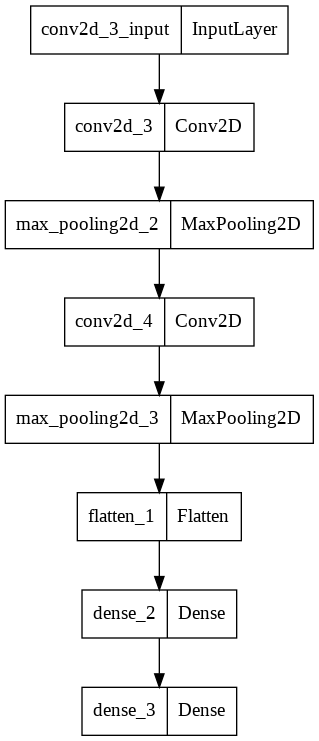

In [ ]:
# 층의 구성을 그림으로 표현
keras.utils.plot_model(model)

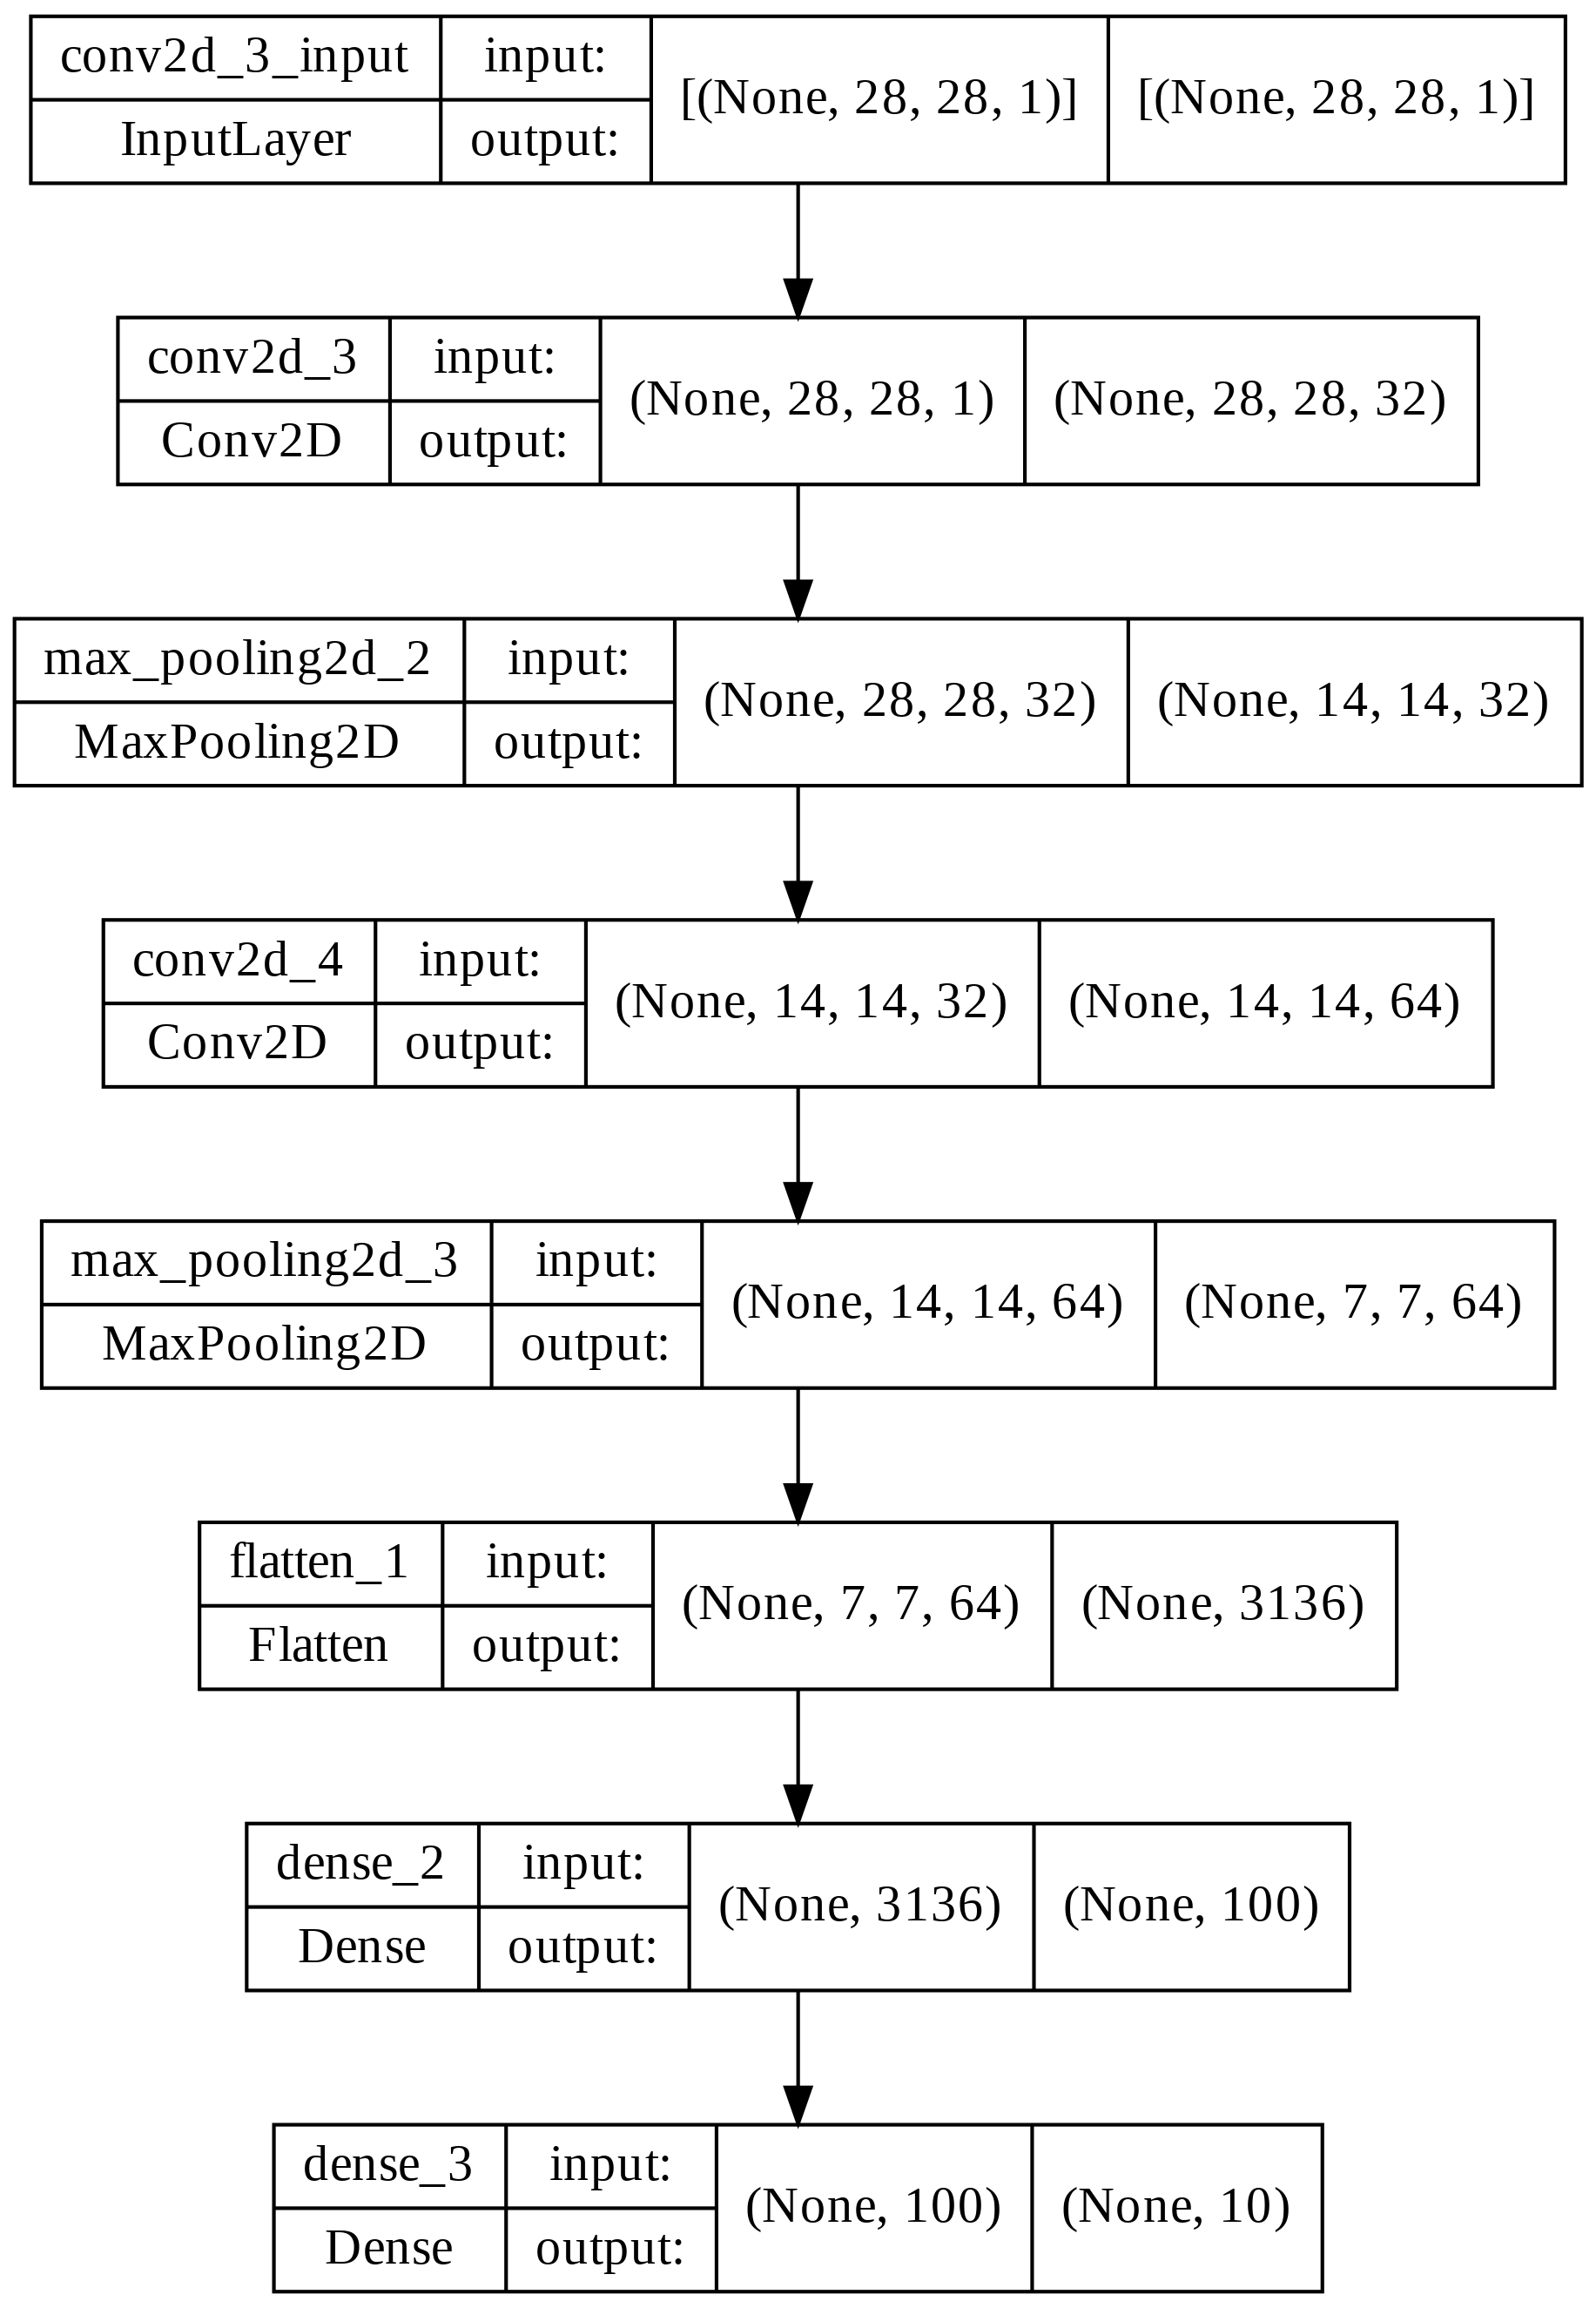

In [ ]:
# show_shapes = True : 입력과 출력의 크기 표시
# to_file = '파일이름' : 출력한 이미지를 파일로 저장
# dpi=300 : 해상도 지정
keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn-architecture.png', dpi = 300)

#### 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
 960/1500 [==================>...........] - ETA: 21s - loss: 0.1305 - accuracy: 0.9518

KeyboardInterrupt: ignored

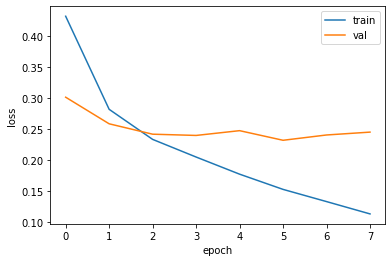

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2322 - accuracy: 0.9158


[0.2322322130203247, 0.9158333539962769]

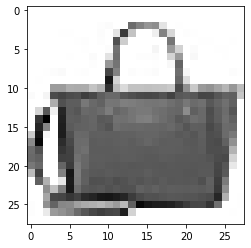

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.7703585e-14 1.1940466e-17 6.4532382e-15 1.2041746e-16 2.9515721e-12
  2.0976690e-13 1.3494620e-14 1.8738509e-13 1.0000000e+00 2.8540212e-15]]


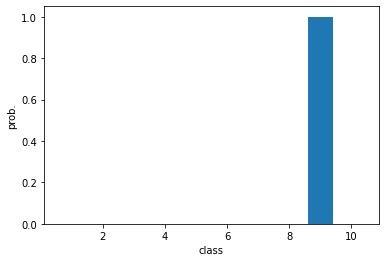

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 7s 20ms/step - loss: 0.2565 - accuracy: 0.9101


[0.2565251588821411, 0.910099983215332]